# IN THIS NOTEBOOK, THERE ARE SOME EARLY EXERCISES AT THE TOP, THEN THE IRIS, TITANIC, AND TELCO EXERCISES ARE SPLIT RESPECTIVELY

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pydataset import data
import statistics
import seaborn as sns
import env
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import scipy
import acquire
import prepare
#from pydataset: data('')
#from seaborn: sns.load_dataset('')

### 4. In a jupyter notebook, `classification_exercises.ipynb`, use a python module (pydata or seaborn datasets) containing datasets as a source from the iris data. Create a pandas dataframe, `df_iris`, from this data.

    - print the first 3 rows

In [ ]:
df_iris = sns.load_dataset('iris')
df_iris.head(3)

    - print the number of rows and columns (shape)

In [ ]:
df_iris.shape

    - print the column names

In [ ]:
df_iris.columns

    - print the data type of each column

In [ ]:
df_iris.columns.to_list()

In [ ]:
df_iris.dtypes

    - print the summary statistics for each of the numeric variables. Would you
      recommend rescaling the data based on these statistics?

In [ ]:
stats = df_iris.describe().T
stats
# no need to rescale, all scales the same. Ravinder says we will address in detail later

In [ ]:
stats['range'] = stats['max'] - stats['min']
stats

### 5. Read the `Table1_CustDetails` table from the `Excel_Exercises.xlsx` file into a dataframe named `df_excel`.

In [ ]:
df_excel = pd.read_excel('Excel_Exercises.xlsx', sheet_name="Table1_CustDetails")
df_excel.head()

    - assign the first 100 rows to a new dataframe, `df_excel_sample`

In [ ]:
df_excel_sample = pd.read_excel('Excel_Exercises.xlsx', nrows= 100)
df_excel_sample



    - print the number of rows of your original dataframe

In [ ]:
df_excel.shape[0]

    - print the first 5 column names

In [ ]:
df_excel.columns[:5]

    - print the column names that have a data type of `object`

In [ ]:
df_excel.select_dtypes('object')

In [ ]:
df_excel.select_dtypes('object').columns.tolist()

In [ ]:
df_excel.dtypes


    - compute the range for each of the numeric variables.

In [ ]:
df_excel.describe()

In [ ]:
monthly_charges_range = df_excel.monthly_charges.max() - df_excel.monthly_charges.min()
monthly_charges_range

In [ ]:
total_charges_range = df_excel.total_charges.max() - df_excel.total_charges.min()
total_charges_range

In [ ]:
telco_stats = df_excel.describe().T
telco_stats

In [ ]:
telco_stats['range'] = telco_stats['max'] - telco_stats['min']
telco_stats

### 6. Read the data from [this google sheet](https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit?usp=sharing) into a dataframe, `df_google`

    

In [ ]:
sheet_url = 'https://docs.google.com/spreadsheets/d/1Uhtml8KY19LILuZsrDtlsHHDC9wuDGUSe8LTEwvdI5g/edit#gid=341089357'   

csv_export_url = sheet_url.replace('/edit#gid=', '/export?format=csv&gid=')
csv_export_url

In [ ]:
df_google = pd.read_csv(csv_export_url)
df_google.head()

    - print the first 3 rows
    

In [ ]:
df_google.head(3)

    - print the number of rows and columns
    

In [ ]:
df_google.shape

    - print the column names
    

In [ ]:
df_google.columns.to_list()

    - print the data type of each column
    

In [ ]:
df_google.dtypes

    - print the summary statistics for each of the numeric variables
    

In [ ]:
df_google.describe()

    - print the unique values for each of your categorical variables

In [ ]:
# for col in df_google:
#     print(df_google[col].unique())

In [ ]:
# df_google.nunique(axis = 0)

In [ ]:
pd.CategoricalIndex(df_google.Name), pd.CategoricalIndex(df_google.Survived), pd.CategoricalIndex(df_google.Pclass), pd.CategoricalIndex(df_google.Sex), pd.CategoricalIndex(df_google.Embarked)

In [ ]:
# df_google.sample(20)

In [ ]:
# pd.CategoricalIndex(df_google.Sex, )

In [ ]:
category_list = list(df_google.select_dtypes(include = 'object').columns)#.append('Pclass')
category_list.append('Pclass')
category_list

In [ ]:
df_google.Pclass.value_counts(dropna=False)

# Using the Iris Data:

### Use the function defined in acquire.py to load the iris data.

In [ ]:
import acquire

In [ ]:
iris_df = acquire.get_iris_data()
iris_df.head()

In [ ]:
iris_df.shape

In [ ]:
iris_df.info()

In [ ]:
iris_df.describe()

In [ ]:
num_cols = iris_df.columns[[iris_df[col].dtype == 'float64' for col in iris_df.columns]]
num_cols

In [ ]:
for col in num_cols:
    plt.hist(iris_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(iris_df[col])
    plt.show()

In [ ]:
obj_cols = iris_df.columns[[iris_df[col].dtype == 'O' for col in iris_df.columns]]
obj_cols

In [ ]:
for col in obj_cols:
    print(iris_df[col].value_counts())
    print(iris_df[col].value_counts(normalize = True, dropna=False))
    print('------------------------')
        

In [ ]:
iris_df.sample()

### Drop the species_id and measurement_id columns.

In [ ]:
cols_to_drop = ['species_id']
iris_df = iris_df.drop(columns = cols_to_drop)
iris_df.shape

### Rename the species_name column to just species.

In [ ]:
iris_df.rename(columns={'species_name': 'species'}, inplace=True)
iris_df.iloc[105]

### Create dummy variables of the species name and concatenate onto the iris dataframe.

In [ ]:
dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=[True,True])
dummy_df.sample()

In [ ]:
iris_df = pd.concat([iris_df, dummy_df], axis = 1)
iris_df.head()

### Create a function named prep_iris that accepts the untransformed iris data, and returns the data with the transformations above applied.

In [ ]:
def prep_iris(iris_df):
    '''
    tranforms iris data set by dropping, renaming, adding columns
    '''
    iris_df = acquire.get_iris_data()
    cols_to_drop = ['species_id']
    iris_df = iris_df.drop(columns = cols_to_drop)
    iris_df.rename(columns={'species_name': 'species'}, inplace=True)
    dummy_df = pd.get_dummies(iris_df[['species']], dummy_na=False, drop_first=[True,True])
    iris_df = pd.concat([iris_df, dummy_df], axis = 1)

    return iris_df



In [ ]:
# iris_df = acquire.get_iris_data()
# iris_df.head()

# 1. Acquire, prepare & split your data. (exploratory analysis lesson)

In [ ]:
iris_df = prep_iris(iris_df)
iris_df.head()

In [ ]:
def split_data(iris_df):
    '''
    Takes in iris DF and returns train, validate, test sbusert dataframes
    '''
    iris_train, iris_test = train_test_split(iris_df, test_size = .2, stratify=iris_df.species)
    iris_train, iris_validate = train_test_split(iris_train, test_size=.3, stratify=iris_train.species)
    return iris_train, iris_validate, iris_test

In [ ]:
iris_train, iris_validate, iris_test = split_data(iris_df)
print(f'iris_train: {iris_train.shape}')
print(f'iris_validate: {iris_validate.shape}')
print(f'iris_test: {iris_test.shape}')

# as you can see, we now have split the data into 3 sets

# Univariate Stats
### For each measurement type (quantitative variable): create a histogram, boxplot, & compute descriptive statistics (using .describe()).

In [ ]:
iris_train.sample()

In [ ]:
iris_train.info()

In [ ]:
iris_train.describe()

In [ ]:
num_cols = iris_train.columns[[iris_train[col].dtype == 'float64' for col in iris_df.columns]]
num_cols

In [ ]:
for col in num_cols:
    plt.hist(iris_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(iris_df[col])
    plt.show()

### For each species (categorical variable): create a frequency table and a bar plot of those frequencies.

In [ ]:
iris_train.species.value_counts()

In [ ]:
virginica = iris_train[iris_train.species == 'virginica']
setosa = iris_train[iris_train.species == 'setosa']
versicolor = iris_train[iris_train.species == 'versicolor']

In [ ]:
virginica.hist()

# takeaways:
# for viriginica, sepal length and width are relatively normal
# petal lenght and width aren't so normal

In [ ]:
virginica.boxplot()
# note how the different measureable values are all over. relation btwn sepal lenght and width? petal?

In [ ]:
setosa.hist()
# setosa takeways...petal widths are kind of discrete seeming. 
# all categories are sort of less normal distributed

In [ ]:
setosa.boxplot()
# all going down...no relation btwn each other, but maybe an identifying point related to virginica?

In [ ]:
versicolor.hist()
#versicolor takeaways: similar as with setosa

In [ ]:
versicolor.boxplot()
# similar to what we saw on virginica

### Document takeaways & any actions

- see above

# Bivariate Stats

### Visualize each measurement type (y-axis) with the species variable (x-axis) using barplots, adding a horizontal line showing the overall mean of the metric (y-axis).


### For each measurement type, compute the descriptive statistics for each species

In [ ]:
iris_train.head(1)

In [ ]:
plt.title("Virginica have a longer Sepal")
sns.barplot(x="species", y="sepal_length", data=iris_train)
mean_sepal_length = iris_train.sepal_length.mean()
plt.axhline(mean_sepal_length, label="Mean Sepal Length")
plt.legend()
plt.show()

In [ ]:
iris_train.sepal_length.describe()

In [ ]:
plt.title("Setosa have a Wider Sepal")
sns.barplot(x="species", y="sepal_width", data=iris_train)
mean_sepal_width = iris_train.sepal_width.mean()
plt.axhline(mean_sepal_width, label="Mean Sepal Width")
plt.legend()
plt.show()

In [ ]:
iris_train.sepal_width.describe()

In [ ]:
plt.title("Setosa have a Shorter Petal, Virginica Longer")
sns.barplot(x="species", y="petal_length", data=iris_train)
mean_petal_length = iris_train.petal_length.mean()
plt.axhline(mean_petal_length, label="Mean Petal Length")
plt.legend()
plt.show()

In [ ]:
iris_train.petal_length.describe()

In [ ]:
plt.title("Setosa have a Narrower Petal, Virginica Wider")
sns.barplot(x="species", y="petal_width", data=iris_train)
mean_petal_width = iris_train.petal_width.mean()
plt.axhline(mean_petal_width, label="Mean Petal Width")
plt.legend()
plt.show()

In [ ]:
iris_train.petal_width.describe()

### For virginica & versicolor: Compare the mean petal_width using the Mann-Whitney test (scipy.stats.mannwhitneyu) to see if there is a significant difference between the two groups. 

### Do the same for the other measurement types

In [ ]:
import scipy
iris_train.sample()

In [ ]:
versicolor = iris_train[iris_train.species_versicolor == 1]
virginica = iris_train[iris_train.species_virginica == 1]
setosa = iris_train[(iris_train.species_versicolor == 0) & (iris_train.species_virginica == 0)]

In [ ]:
versicolor.petal_width.var(), virginica.petal_width.var()

In [ ]:

null_hypothesis = "versicolor petal width is greater than or equal to that of virginica"
alternative_hypothesis = "versicolor petal width is less than that of virginica"



In [ ]:
alpha = .05
t, p = scipy.stats.mannwhitneyu(versicolor.petal_width, virginica.petal_width)
t, p

In [ ]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

In [ ]:
versicolor.petal_length.var(), virginica.petal_length.var()

In [ ]:
null_hypothesis = "versicolor petal length is greater than or equal to that of virginica"
alternative_hypothesis = "versicolor petal length is less than that of virginica"

In [ ]:
alpha = .05
t, p = scipy.stats.mannwhitneyu(versicolor.petal_length, virginica.petal_length)
t, p

In [ ]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

In [ ]:
versicolor.sepal_width.var(), virginica.sepal_width.var()

In [ ]:
null_hypothesis = "versicolor sepal width is greater than or equal to that of virginica"
alternative_hypothesis = "versicolor sepal width is less than that of virginica"

In [ ]:
alpha = .05
t, p = scipy.stats.mannwhitneyu(versicolor.sepal_width, virginica.sepal_width)
t, p

In [ ]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

In [ ]:
versicolor.sepal_length.var(), virginica.sepal_length.var()

In [ ]:
null_hypothesis = "versicolor sepal lenght is greater than or equal to that of virginica"
alternative_hypothesis = "versicolor sepal length is less than that of virginica"

In [ ]:
alpha = .05
t, p = scipy.stats.mannwhitneyu(versicolor.sepal_length, virginica.sepal_length)
t, p

In [ ]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

# MULTIVARIATE STATS

### Visualize the interaction of each measurement type with the others using a pairplot (or scatter matrix or something similar) and add color to represent species.

In [ ]:
sns.pairplot(iris_train, hue = 'species', corner=True)

#check out that clear relationship between petal_width and petal_length for each species

In [ ]:
iris_train.sample()

### Visualize two numeric variables by means of the species. Hint: sns.relplot with hue or col

In [ ]:
rel = sns.relplot(x='sepal_length', y='sepal_width', data=iris_train, col="species")
rel.fig.suptitle('Sepal Length to Sepal Width, column by Species') # One way to title a relplot
plt.tight_layout()

#notice how we assign the sns graphic to a variable, and use the variable to super title the many graphs

In [ ]:
rel = sns.relplot(x='petal_length', y='petal_width', data=iris_train, col="species")
rel.fig.suptitle('Petal Length to Petal Width, column by Species') # One way to title a relplot
plt.tight_layout()

### Create a swarmplot using a melted dataframe of all your numeric variables. The x-axis should be the variable name, the y-axis the measure. Add another dimension using color to represent species. Document takeaways from this visualization.

In [ ]:
iris_train.sample()

In [ ]:
iris_melted = iris_train.drop(columns=['species_versicolor', 'species_virginica','sepal_area','petal_area']).melt(id_vars='species')
iris_melted

In [ ]:
plt.figure(figsize = (10, 8))
sns.swarmplot(x='variable', y='value', data=iris_melted, hue = 'species')


In [ ]:
# key takeaways: petal length as an identifier; also petal width. Sepal width not so helpful; sepal length
# could help id setosa but not so handy for the other two species

### Ask a specific question of the data, such as: is the sepal area signficantly different in virginica compared to setosa? Answer the question through both a plot and using a mann-whitney or t-test. If you use a t-test, be sure assumptions are met (independence, normality, equal variance).

In [ ]:
iris_train.sample()


In [ ]:
iris_train['sepal_area'] = iris_train.sepal_length * iris_train.sepal_width
iris_train['petal_area'] = iris_train.petal_length * iris_train.petal_width


iris_train.sample()

In [ ]:
iris_train.sepal_area.hist() 


In [ ]:
iris_train.petal_area.hist()

In [ ]:
plt.title("Sepal Area Differs Between Species")
sns.barplot(x="species", y="sepal_area", data=iris_train)
mean_sepal_area = iris_train.sepal_area.mean()
plt.axhline(mean_sepal_area, label="Mean Sepal Area")
plt.legend()
plt.show()

In [ ]:
plt.title("There Is a Considerable Difference in Petal Area between Species")
sns.barplot(x="species", y="petal_area", data=iris_train)
mean_petal_area = iris_train.petal_area.mean()
plt.axhline(mean_petal_area, label="Mean Petal Area")
plt.legend()
plt.show()

In [ ]:
iris_melted = iris_train.drop(columns=['species_versicolor', 'species_virginica']).melt(id_vars='species')
plt.figure(figsize = (10, 8))
sns.swarmplot(x='variable', y='value', data=iris_melted, hue = 'species')

In [ ]:
# sepal area is a terrible indicator of species, as seen above.  
# petal area, on the other hand, might be the best.  as good or better than petal length

In [ ]:
virginica = iris_train[iris_train.species == 'virginica']
setosa = iris_train[iris_train.species == 'setosa']
versicolor = iris_train[iris_train.species == 'versicolor']

In [ ]:
versicolor.petal_area.var(), virginica.petal_area.var(), setosa.petal_area.var()

In [ ]:
null_hypothesis = "virginica petal area is less than or equal to that of versicolor"
alternative_hypothesis = "virginica petal wirea adth is greater than that of versicolor"

alpha = .01
t, p = scipy.stats.mannwhitneyu(virginica.petal_area, versicolor.petal_area)

print(t,p)

if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

In [ ]:
null_hypothesis = "versicolor petal area is less than or equal to that of setosa"
alternative_hypothesis = "versicolor petal area is greater than that of setosa"

alpha = .01
t, p = scipy.stats.mannwhitneyu(versicolor.petal_area, setosa.petal_area)

print(t,p)

if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

## my theory stated and tested above is that the each respective species has a greater petal area than the previous. alpha was set at .01

# Using the Titanic dataset

### Use the function defined in acquire.py to load the Titanic data.

In [18]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


### Drop any unnecessary, unhelpful, or duplicated columns.

In [19]:
titanic_df = prepare.clean_data(titanic_df)

In [20]:
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [21]:
#whoops already did that in the step above

### Create a function named prep_titanic that accepts the raw titanic data, and returns the data with the transformations above applied.

In [22]:
def prep_titanic(titanic_df):
    '''
    This function will clean the data etc etc...
    '''
    
    titanic_df = titanic_df.drop_duplicates()
    cols_to_drop = ['deck', 'embarked', 'class']
    titanic_df = titanic_df.drop(columns = cols_to_drop)
    titanic_df['embark_town'] = titanic_df.embark_town.fillna(value='Southampton')
    dummy_df = pd.get_dummies(titanic_df[['sex', 'embark_town']], dummy_na=False, drop_first=[True,True])
    titanic_df = pd.concat([titanic_df, dummy_df], axis = 1)
    return titanic_df

In [23]:
titanic_df = acquire.get_titanic_data()
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1
3,3,1,1,female,35.0,1,0,53.1000,S,First,C,Southampton,0
4,4,0,3,male,35.0,0,0,8.0500,S,Third,NaN,Southampton,1


In [24]:
titanic_df = prep_titanic(titanic_df)
titanic_df.head()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
0,0,0,3,male,22.0,1,0,7.2500,Southampton,0,1,0,1
1,1,1,1,female,38.0,1,0,71.2833,Cherbourg,0,0,0,0
2,2,1,3,female,26.0,0,0,7.9250,Southampton,1,0,0,1
3,3,1,1,female,35.0,1,0,53.1000,Southampton,0,0,0,1
4,4,0,3,male,35.0,0,0,8.0500,Southampton,1,1,0,1


In [25]:
def train_validate_test_split(df, target, seed=123):
    '''
    This function takes in a dataframe, the name of the target variable
    (for stratification purposes), and an integer for a setting a seed
    and splits the data into train, validate and test. 
    Test is 20% of the original dataset, validate is .30*.80= 24% of the 
    original dataset, and train is .70*.80= 56% of the original dataset. 
    The function returns, in this order, train, validate and test dataframes. 
    '''
    train_validate, titanic_test = train_test_split(df, test_size=0.2, 
                                            random_state=seed, 
                                            stratify=df[target])
    titanic_train, titanic_validate = train_test_split(train_validate, test_size=0.3, 
                                       random_state=seed,
                                       stratify=train_validate[target])
    return titanic_train, titanic_validate, titanic_test

In [26]:
titanic_train, titanic_validate, titanic_test = train_validate_test_split(titanic_df, target='survived')
titanic_train.shape, titanic_validate.shape, titanic_test.shape

((498, 13), (214, 13), (179, 13))

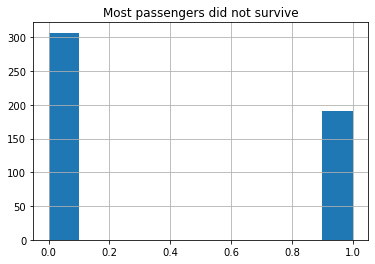

In [27]:
plt.title("Most passengers did not survive")
titanic_train.survived.hist()
plt.show()



In [28]:
# We can call .mean() since 0 and 1 are numeric
print("Percent survived from titanic_train")
round(titanic_train.survived.mean(), 3)

Percent survived from titanic_train


0.384

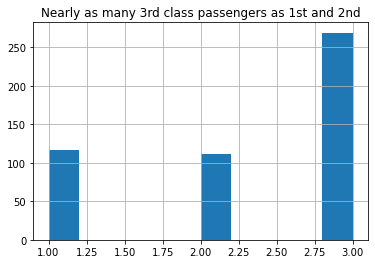

In [29]:
plt.title("Nearly as many 3rd class passengers as 1st and 2nd")
titanic_train.pclass.hist()
plt.show()

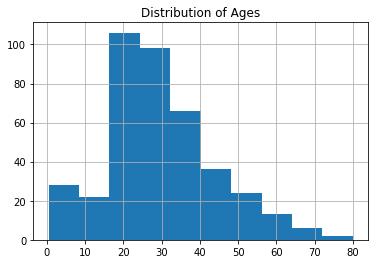

In [30]:
plt.title("Distribution of Ages")
titanic_train.age.hist()
plt.show()

In [31]:
titanic_train.sample()

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton
688,688,0,3,male,18.0,0,0,7.7958,Southampton,1,1,0,1


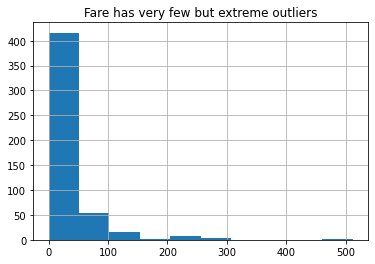

In [32]:
plt.title("Fare has very few but extreme outliers")
titanic_train.fare.hist()
plt.show()

In [33]:
## are we going to have to deal with those outlying fares?


# next, bivariate

## if you use y/n (1/0) for the y axis, you're basically giving yourself the percentage.  take note below

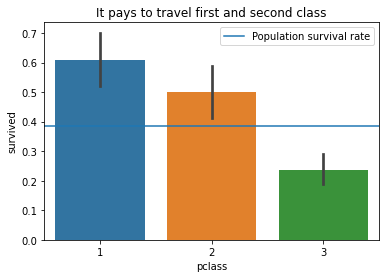

In [34]:
plt.title("It pays to travel first and second class")
sns.barplot(x="pclass", y="survived", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [40]:
### hypothesis test immediately following, for thoroughness's sake:
from scipy import stats

In [41]:
# The above visual is quite clear, but if it was less clear or we want more certainty, we'll run a hypothesis test
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05
null_hypothesis = "survival and class of ticket are independent"
alternative_hypothesis = "there is a relationship between class of ticket and survival"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(titanic_train.survived, titanic_train.pclass)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and class of ticket are independent
Sufficient evidence to move forward understanding that there is a relationship between class of ticket and survival


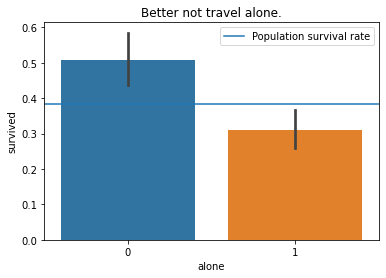

In [42]:
plt.title("Better not travel alone.")
sns.barplot(x="alone", y="survived", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [43]:
# If the visual was unclear or we need more confirmation, run a hypothesis test
# Let's run a chi squared to compare proportions
alpha = 0.05
null_hypothesis = "survival and traveling alone are independent"
alternative_hypothesis = "there is a relationship between survival and traveling alone"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(titanic_train.survived, titanic_train.alone)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and traveling alone are independent
Sufficient evidence to move forward understanding that there is a relationship between survival and traveling alone


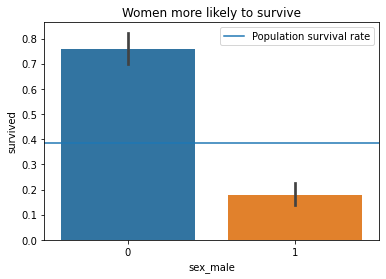

In [51]:
plt.title("Women more likely to survive")
sns.barplot(x='sex_male', y="survived", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate, label="Population survival rate")
plt.legend()
plt.show()

In [53]:
# Let's run a chi squared to compare proportions, to have more confidence
alpha = 0.05

null_hypothesis = "survival and gender are independent"
alternative_hypothesis = "there is a relationship between survival and gender"

# Setup a crosstab of observed survival to pclass
observed = pd.crosstab(titanic_train.survived, titanic_train.sex_male)

chi2, p, degf, expected = stats.chi2_contingency(observed)

if p < alpha:
    print("Reject the null hypothesis that", null_hypothesis)
    print("Sufficient evidence to move forward understanding that", alternative_hypothesis)
else:
    print("Fail to reject the null")
    print("Insufficient evidence to reject the null")

Reject the null hypothesis that survival and gender are independent
Sufficient evidence to move forward understanding that there is a relationship between survival and gender


## numeric vs categorical

H
0
: Survived passenger fares cost less than or equal to non-surviving passenger fare

H
a
: Surviving passenger fares cost more than non-surviving passenger fares

In [54]:
not_survived = titanic_train[titanic_train.survived == 0]
survived = titanic_train[titanic_train.survived == 1]

In [55]:
not_survived.fare.var(), survived.fare.var()

(1147.9409071240707, 3687.77476607355)

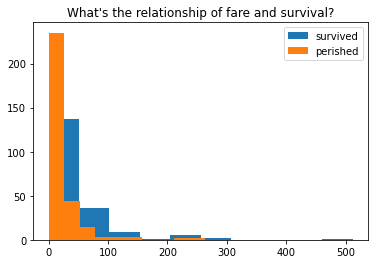

In [56]:
plt.title("What's the relationship of fare and survival?")
plt.hist(survived.fare, label="survived")
plt.hist(not_survived.fare, label="perished")
plt.legend()
plt.show()

#plain matplotlib
# the story is unclear from the visual, so a hypothesis test should be run

In [57]:
null_hypothesis = "fares paid by survived passengers are less than or equal to fares paid by non-surviving passengers"
alternative_hypothesis = "fares paid by surviving passengers are higher than non-surviving passengers"

# Use Mann Whitney u-test when t-test assumptions do not hold.
# The distributions are not normal and the variances are not equal, so we'll do mann-whitney
t, p = stats.mannwhitneyu(survived.fare, not_survived.fare, alternative="greater")
# alternative argument handles the directionality. b/c of this argument, we don't have to check if t is + or -

In [58]:
if p < alpha:
    print("We find evidence to reject the null hypothesis that", null_hypothesis)
    print("We find evidence evidence to move forward with the understaind that", alternative_hypothesis)
else:
    print("We fail to reject the null hypothesis")
    print("There is no evidence that", null_hypothesis)

We find evidence to reject the null hypothesis that fares paid by survived passengers are less than or equal to fares paid by non-surviving passengers
We find evidence evidence to move forward with the understaind that fares paid by surviving passengers are higher than non-surviving passengers


# MULTIVARIATE analysis

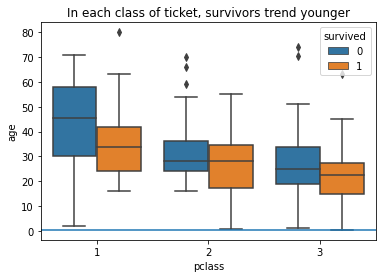

In [59]:
# At each class ticket, women have better survival rates
plt.title("In each class of ticket, survivors trend younger")
sns.boxplot(x="pclass", y="age", data=titanic_train, hue="survived")
population_survival_rate = titanic_train.survived.mean()
plt.axhline(population_survival_rate)
plt.show()

In [61]:
# are there enough 1st class passengers to draw conclusions?
titanic_train[titanic_train.pclass == 1].survived.value_counts()

1    71
0    46
Name: survived, dtype: int64

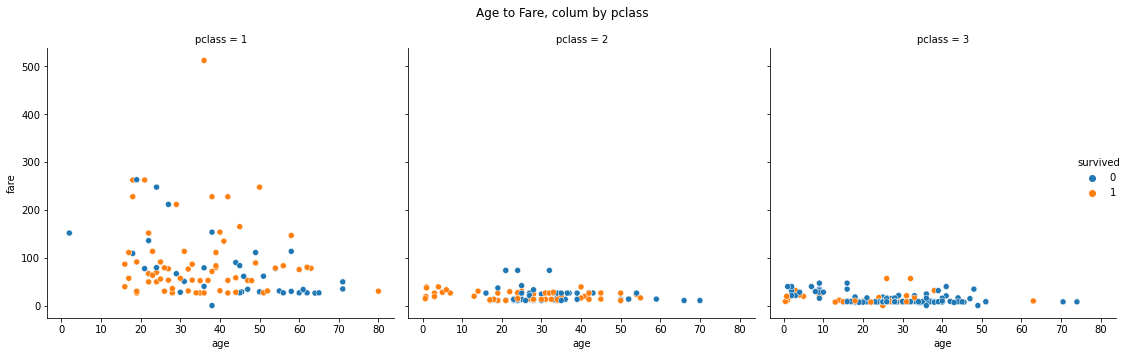

In [62]:
# No discernable relationship between age and fare, but the pclass relates to survival
rel = sns.relplot(x='age', y='fare', data=titanic_train, col="pclass", hue="survived")
rel.fig.suptitle('Age to Fare, colum by pclass') # One way to title a relplot
plt.tight_layout()

In [63]:
# fare and age don't seem to relate
# however, the more people paid, the more orange we see

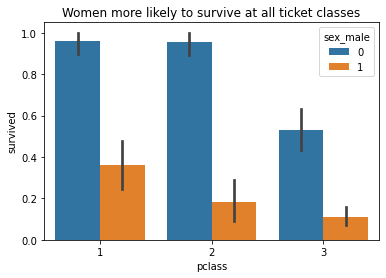

In [66]:
plt.title("Women more likely to survive at all ticket classes")
sns.barplot(x="pclass", y="survived", hue="sex_male", data=titanic_train)
population_survival_rate = titanic_train.survived.mean()
plt.show()

In [68]:
women_in_3rd_class = titanic_train[(titanic_train.pclass == 3) & (titanic_train.sex_male == 0)]
men_in_3rd_class = titanic_train[(titanic_train.pclass == 3) & (titanic_train.sex_male == 1)]

print(f"Overall survival rate:", round(titanic_train.survived.mean(), 2))
print(f"Overall female survival rate", round(titanic_train[titanic_train.sex_male == 0].survived.mean(), 2))
print(f"Overall male survival rate", round(titanic_train[titanic_train.sex_male == 1].survived.mean(), 2))
print(f"3rd class ticket survival rate", round(titanic_train[titanic_train.pclass == 3].survived.mean(), 2))
print(f"Survival rate for women in 3rd class:", round(women_in_3rd_class.survived.mean(), 2))
print(f"Survival rate for men in 3rd class:", round(men_in_3rd_class.survived.mean(), 2))

Overall survival rate: 0.38
Overall female survival rate 0.76
Overall male survival rate 0.18
3rd class ticket survival rate 0.24
Survival rate for women in 3rd class: 0.53
Survival rate for men in 3rd class: 0.11


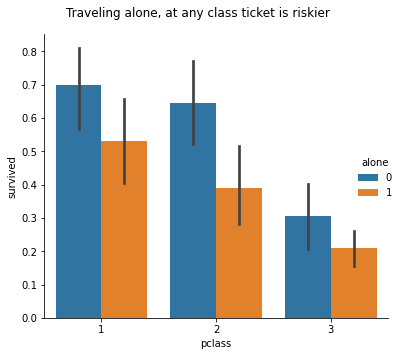

In [69]:
cat = sns.catplot(data=titanic_train, x="pclass", y="survived", hue="alone", kind="bar")
cat.fig.suptitle("Traveling alone, at any class ticket is riskier")
plt.tight_layout()

# Using the Telco dataset

### Use the function defined in acquire.py to load the Telco data.

In [ ]:
telco_df = acquire.get_telco_data()
telco_df.head()

In [ ]:
telco_df.shape

In [ ]:
telco_df.info()

In [ ]:
telco_df.describe()

In [ ]:
num_cols = telco_df.columns[[telco_df[col].dtype in ('int64', 'float64') for col in telco_df.columns]]
num_cols

In [ ]:
for col in num_cols:
    plt.hist(telco_df[col])
    plt.title(col)
    plt.show()
    plt.boxplot(telco_df[col])
    plt.show()

In [ ]:
obj_cols = telco_df.columns[[telco_df[col].dtype == 'O' for col in telco_df.columns]]
obj_cols

In [ ]:
for col in obj_cols:
    print(telco_df[col].value_counts())
    print(telco_df[col].value_counts(normalize = True, dropna=False))
    print('------------------------')
        

In [ ]:
telco_df.monthly_charges.value_counts(bins=5, sort=False)

In [ ]:
missing = telco_df.isnull().sum()
missing[missing > 0]
# no null values in the dataset.  

In [ ]:
telco_df.sample()

### Drop any unnecessary, unhelpful, or duplicated columns. This could mean dropping foreign key columns but keeping the corresponding string values, for example.

In [ ]:
# total charges is a string that needs to be converted to float
# 0   payment_type_id           7043 non-null   int64   DROP IT
# 1   internet_service_type_id  7043 non-null   int64   DROP IT
# 2   contract_type_id          7043 non-null   int64   DROP IT
# 3   customer_id               7043 non-null   object  
# 4   gender                    7043 non-null   object  NEED TO DUMMY
# 5   senior_citizen            7043 non-null   int64   NEED TO DUMMY
# 6   partner                   7043 non-null   object  DUMMY IT
# 7   dependents                7043 non-null   object  DUMMY IT
# 8   tenure                    7043 non-null   int64  
# 9   phone_service             7043 non-null   object  DUMMY.....YES/NO....'HAS_PHONE_SVC'
# 10  multiple_lines            7043 non-null   object  DUMMY IT--THIS HAS 3 POSSIBLE VALUES
# 11  online_security           7043 non-null   object  DITTO 
# 12  online_backup             7043 non-null   object  DITTO
# 13  device_protection         7043 non-null   object  DITTO
# 14  tech_support              7043 non-null   object  DITTO
# 15  streaming_tv              7043 non-null   object  DITTO
# 16  streaming_movies          7043 non-null   object  DITTO
# 17  paperless_billing         7043 non-null   object  YES/NO....DUMMY IT
# 18  monthly_charges           7043 non-null   float64
# 19  total_charges             7043 non-null   object  CONVERT TO FLOAT. ALSO...WE HAVE MISSING VALUES :(
# 20  churn                     7043 non-null   object  DUMMY
# 21  contract_type             7043 non-null   object  3 OPTIONS, DUMMY IT
# 22  internet_service_type     7043 non-null   object  SAME
# 23  payment_type              7043 non-null   object  4 OPTIONS, DUMMY?

In [ ]:
# drop any possible duplicates, of which there weren't any
print(telco_df.shape)
telco_df = telco_df.drop_duplicates()
print(telco_df.shape)

In [ ]:
cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
telco_df = telco_df.drop(columns = cols_to_drop)
telco_df.shape

In [ ]:
telco_df.total_charges.iloc[85]
#there seems to be a missing value here, who knows where ielse

In [ ]:
missing = telco_df.isnull().sum()
missing[missing > 0]
# according to this, there are no missing values

In [ ]:
#ok, it turns out there are 11 rows with no total_charge value:
telco_df.total_charges[(telco_df.total_charges == ' ')]

In [ ]:
# so let's take a stab at filling " " values with 0
telco_df.total_charges.replace(' ',0, inplace=True)
print(telco_df.total_charges.iloc[85])
print(telco_df.total_charges[(telco_df.total_charges == ' ')])
# ok looks like that did the trick

In [ ]:
# i'm going to get total_charges into float format here:
telco_df.total_charges = telco_df.total_charges.astype(float)
print(telco_df.total_charges.iloc[85])

# done, finally. '.info' is showing total_charges as float64 now

In [ ]:
telco_df.info()

### Encode the categorical columns. Create dummy variables of the categorical columns and concatenate them onto the dataframe.

In [ ]:
# 4   gender                    7043 non-null   object  NEED TO DUMMY
# 5   senior_citizen            7043 non-null   int64   NEED TO DUMMY
# 6   partner                   7043 non-null   object  DUMMY IT
# 7   dependents                7043 non-null   object  DUMMY IT
# 9   phone_service             7043 non-null   object  DUMMY.....YES/NO....'HAS_PHONE_SVC'
# 10  multiple_lines            7043 non-null   object  DUMMY IT--THIS HAS 3 POSSIBLE VALUES
# 11  online_security           7043 non-null   object  DITTO 
# 12  online_backup             7043 non-null   object  DITTO
# 13  device_protection         7043 non-null   object  DITTO
# 14  tech_support              7043 non-null   object  DITTO
# 15  streaming_tv              7043 non-null   object  DITTO
# 16  streaming_movies          7043 non-null   object  DITTO
# 17  paperless_billing         7043 non-null   object  YES/NO....DUMMY IT
# 20  churn                     7043 non-null   object  DUMMY
# 21  contract_type             7043 non-null   object  3 OPTIONS, DUMMY IT
# 22  internet_service_type     7043 non-null   object  SAME
# 23  payment_type              7043 non-null   object  4 OPTIONS, DUMMY?

In [ ]:
cols_to_dummy = telco_df[['gender','senior_citizen','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']]
dummy_df = pd.get_dummies(cols_to_dummy, dummy_na=False, drop_first=[True,True])
print(dummy_df.shape)
dummy_df


In [ ]:
telco_df = pd.concat([telco_df, dummy_df], axis = 1)
print(telco_df.shape)
telco_df.head()

In [ ]:
telco_df.info()

### Create a function named prep_telco that accepts the raw telco data, and returns the data with the transformations above applied.

In [ ]:
# testing my function below...
telco_df = acquire.get_telco_data()

In [ ]:
def prep_telco(telco_df):
    telco_df = telco_df.drop_duplicates()
    cols_to_drop = ['payment_type_id', 'internet_service_type_id', 'contract_type_id']
    telco_df = telco_df.drop(columns = cols_to_drop)
    telco_df.total_charges.replace(' ',0, inplace=True)
    telco_df.total_charges = telco_df.total_charges.astype(float)
    cols_to_dummy = telco_df[['gender','senior_citizen','partner','dependents','phone_service','multiple_lines','online_security','online_backup','device_protection','tech_support','streaming_tv','streaming_movies','paperless_billing','churn','contract_type','internet_service_type','payment_type']]
    dummy_df = pd.get_dummies(cols_to_dummy, dummy_na=False)
    telco_df = pd.concat([telco_df, dummy_df], axis = 1)

    return telco_df


In [ ]:
telco_prepped = prep_telco(telco_df)

In [ ]:
telco_prepped.info()

# extra credit: split the data

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [ ]:
def split_data(telco_prepped):
    '''
    Takes in a dataframe and returns train, validate, test sbusert dataframes
    '''
    train, test = train_test_split(telco_prepped, test_size = .2, stratify=telco_prepped.churn_Yes)
    train, validate = train_test_split(train, test_size=.3, stratify=train.churn_Yes)
    return train, validate, test



In [ ]:
telco_prepped.shape

In [ ]:
train, validate, test = split_data(telco_prepped)
print(f'Train: {train.shape}')
print(f'Validate: {validate.shape}')
print(f'Test: {test.shape}')

## think about how to structure this so that you don't have to change the name of the df going into the function